In [10]:
import numpy as np
from scipy.stats import chisquare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.stats import chi2_contingency



<h1> Question 1 </h1>

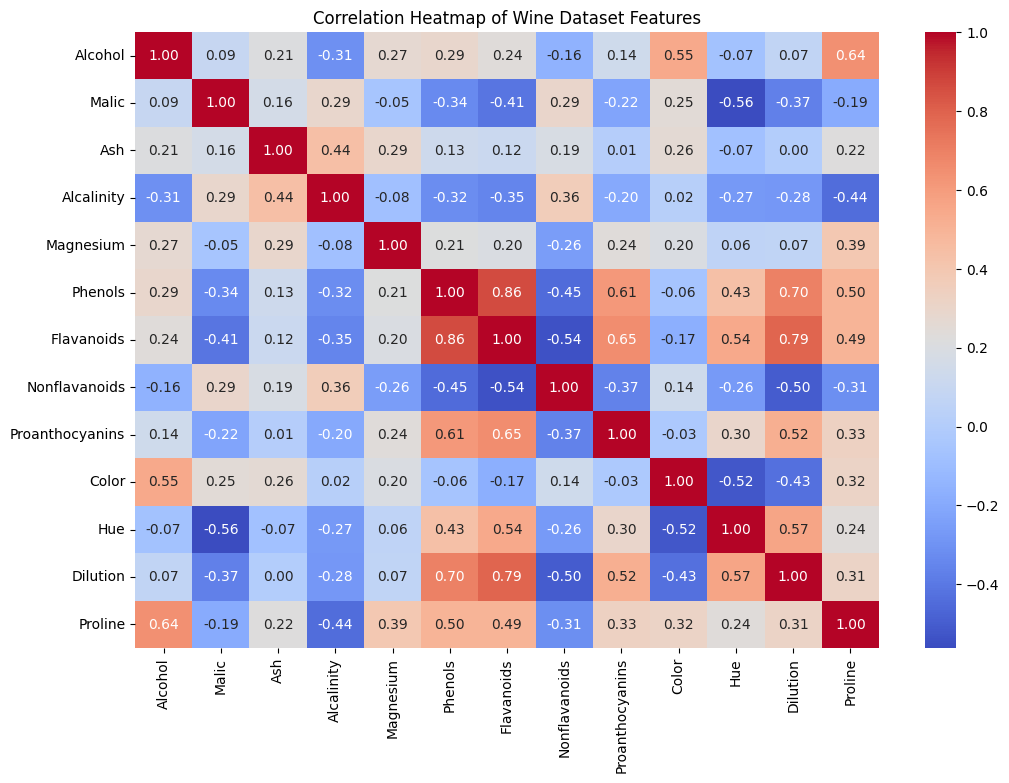

In [16]:
# 

wine_data = pd.read_excel("wine.xlsx")

features = wine_data.drop(columns=['Type'])

correlation_matrix = features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Dataset Features")
plt.show()


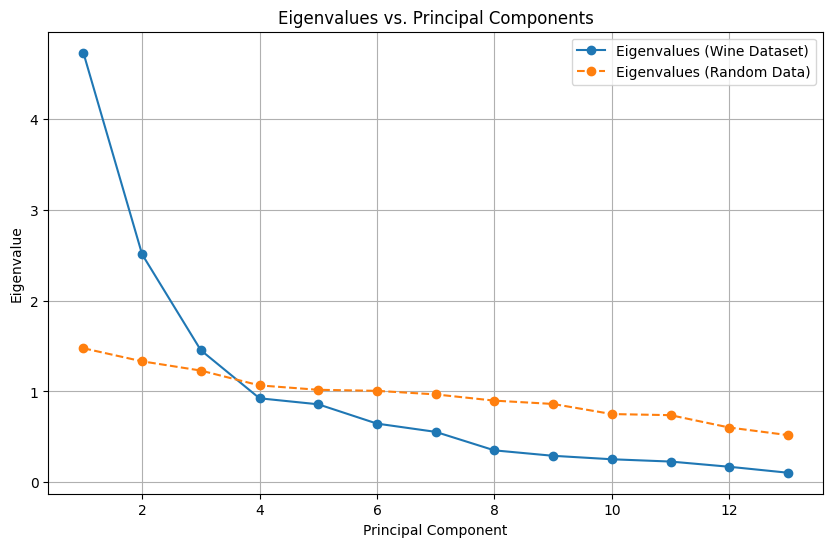

Number of principal components to retain based on parallel analysis: 3


In [17]:

X = wine_data.drop(columns=['Type'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

eigenvalues = pca.explained_variance_

random_data = np.random.normal(size=X_scaled.shape)

pca_random = PCA()
pca_random.fit(random_data)
eigenvalues_random = pca_random.explained_variance_

while np.all(eigenvalues_random == 0):
    random_data = np.random.normal(size=X_scaled.shape)
    pca_random = PCA()
    pca_random.fit(random_data)
    eigenvalues_random = pca_random.explained_variance_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label='Eigenvalues (Wine Dataset)')
plt.plot(range(1, len(eigenvalues_random) + 1), eigenvalues_random, marker='o', linestyle='--', label='Eigenvalues (Random Data)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs. Principal Components')
plt.legend()
plt.grid(True)
plt.show()

num_components_to_retain = np.sum(eigenvalues > np.mean(eigenvalues_random))
print("Number of principal components to retain based on parallel analysis:", num_components_to_retain)


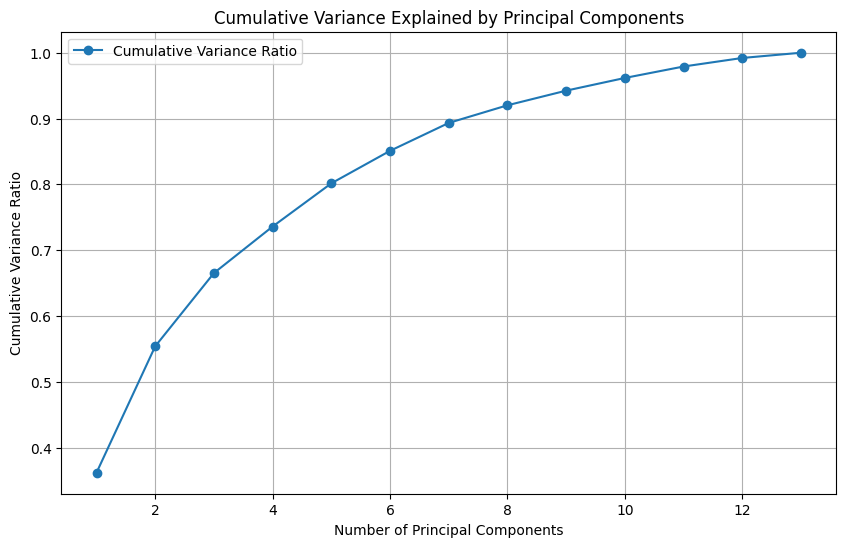

Number of principal components to retain to explain at least 95.0 % of variance: 10


In [7]:



pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', label='Cumulative Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

threshold = 0.95
num_components_to_retain = np.argmax(cumulative_variance_ratio >= threshold) + 1
print("Number of principal components to retain to explain at least", threshold * 100, "% of variance:", num_components_to_retain)


In [8]:


pca = PCA(n_components=3)
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance_ratio)

print("Proportion of variance explained by the first three principal components:")
for i, variance_ratio in enumerate(explained_variance_ratio):
    print("Principal Component {}: {:.2f}%".format(i+1, variance_ratio * 100))

print("\nTotal variance explained by the first three principal components: {:.2f}%".format(total_variance_explained * 100))


Proportion of variance explained by the first three principal components:
Principal Component 1: 36.20%
Principal Component 2: 19.21%
Principal Component 3: 11.12%

Total variance explained by the first three principal components: 66.53%


The fact that the first principal component explains such a large portion of the variance suggests that there is a strong underlying pattern or structure in the data that is captured by this component. It likely represents the dominant trend or feature shared by the wine samples in the dataset.

The very small proportions of variance explained by the second and third principal components suggest that these components capture much less of the variability in the data. This could indicate that the dataset has relatively low-dimensional structure, meaning that most of the variability can be adequately represented by a small number of dimensions or features

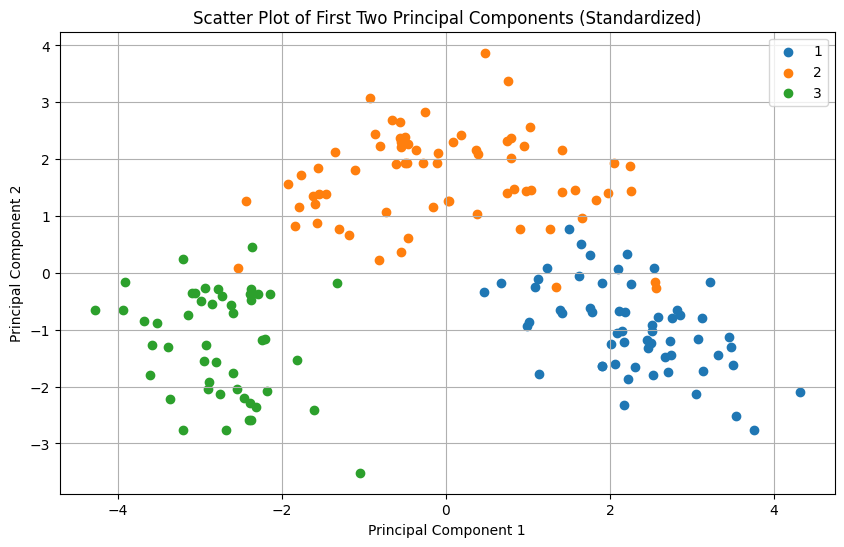

In [9]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for label in wine_data['Type'].unique():
    plt.scatter(principal_components[wine_data['Type'] == label, 0], 
                principal_components[wine_data['Type'] == label, 1], 
                label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


In [16]:


observed = np.array([59, 71, 48])

expected = np.array([np.mean(observed)] * len(observed))

chi2, p_value = chisquare(observed, f_exp=expected)

alpha = 0.05

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The observed distribution significantly differs from an equal distribution.")
else:
    print("Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.")


Chi-Square Statistic: 4.4606741573033695
P-value: 0.10749219070565924
Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.


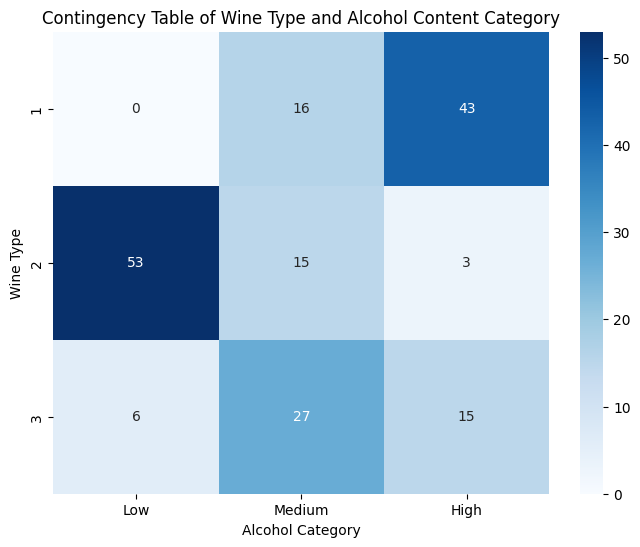

Chi-Square Statistic: 118.77146680058311
P-value: 9.77322789202807e-25
Degrees of Freedom: 4
Reject the null hypothesis. The type of wine and alcohol category are dependent.


In [13]:

# Define alcohol content categories
low_cutoff = wine_data['Alcohol'].quantile(1/3)
medium_cutoff = wine_data['Alcohol'].quantile(2/3)

# Categorize 'Alcohol' content
wine_data['Alcohol Category'] = pd.cut(wine_data['Alcohol'], bins=[0, low_cutoff, medium_cutoff, float('inf')],
                                       labels=['Low', 'Medium', 'High'], right=False)

# Create contingency table
contingency_table = pd.crosstab(wine_data['Type'], wine_data['Alcohol Category'])

# Plot contingency table as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Alcohol Category')
plt.ylabel('Wine Type')
plt.title('Contingency Table of Wine Type and Alcohol Content Category')
plt.show()

# Perform Chi-Squared Test for Independence
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The type of wine and alcohol category are dependent.")
else:
    print("Fail to reject the null hypothesis. The type of wine and alcohol category are independent.")
